In [1]:
# import libraries
import pandas as pd
import numpy as np
from collections import Counter
%matplotlib inline
from matplotlib import pyplot as plt

* Define class NaiveBayes

In [2]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]


    def _pdf(self, class_idx, x):
     mean = self._mean[class_idx]
     var = self._var[class_idx]
     x = np.asarray(x, dtype=mean.dtype)  # Convert x to an array with the same data type as mean
     numerator = np.exp(- (x - mean)**2 / (2 * var))
     denominator = np.sqrt(2 * np.pi * var)
     return numerator / denominator   

* Define function of Accuracy

In [3]:
def accuracy(y_true, y_pred):
     correct = 0
     for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct += 1
     return correct / len(y_true)

* Load Titanic dataset 

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

* Data Analysis

<Axes: >

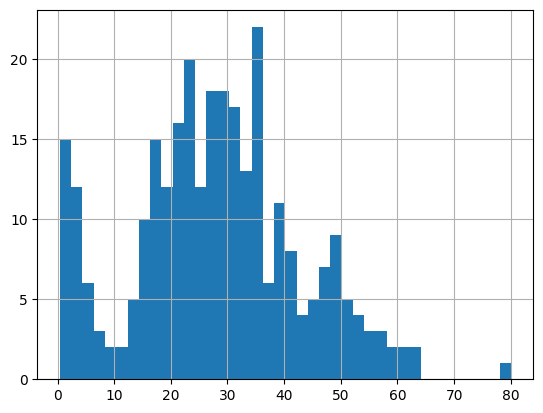

In [5]:
train['Age'].loc[train['Survived']==1].hist(bins=40)

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>],
       [<Axes: xlabel='Survived', ylabel='SibSp'>,
        <Axes: xlabel='Pclass', ylabel='SibSp'>,
        <Axes: xla

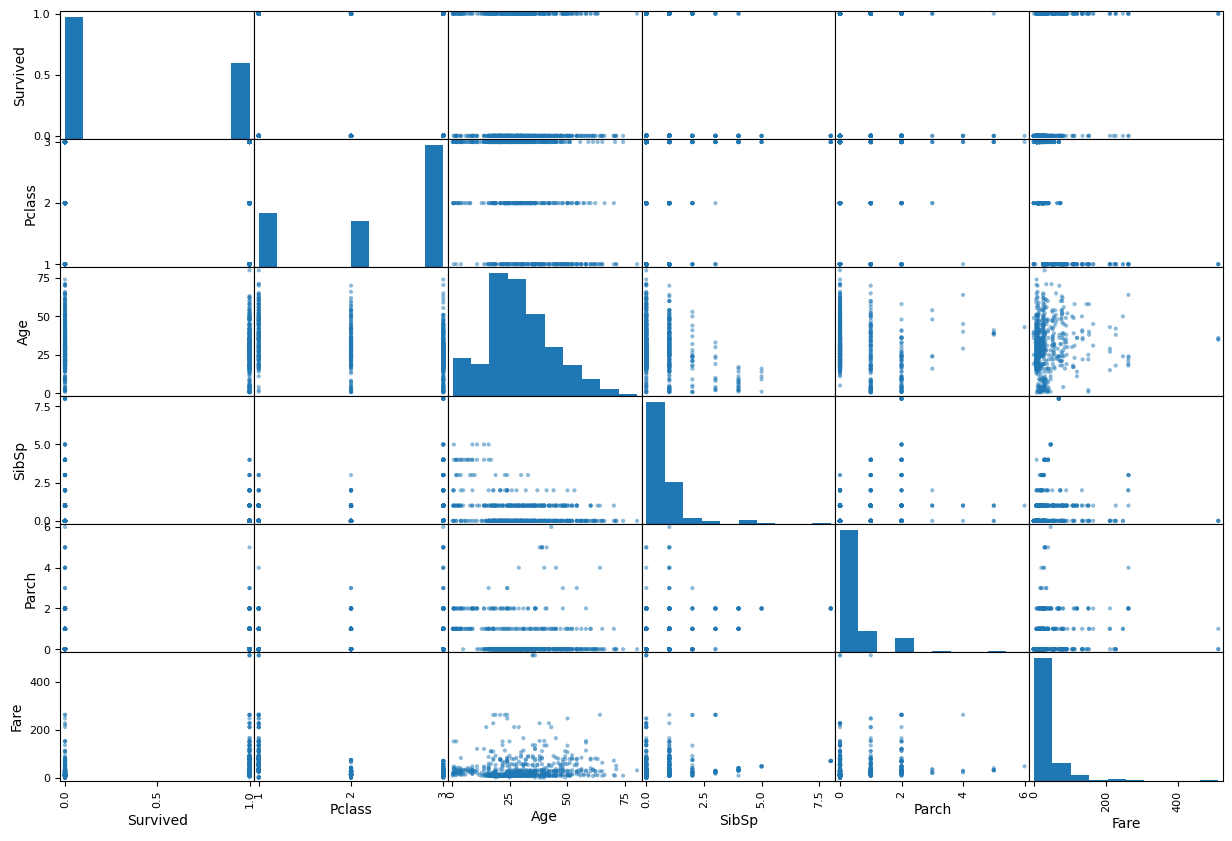

In [6]:
co = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']
pd.plotting.scatter_matrix(train[co],figsize =(15,10),marker='.')

* Data pre-processing

* Drop irrelevant columns

In [7]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

* Convert categorical features to numerical

In [8]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

* check whether any nan values or not

In [9]:
# for train
train.columns[train.isna().any()]

Index(['Age'], dtype='object')

* Handle missing values

In [10]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [11]:
# for test
test.columns[test.isna().any()]

Index(['Age', 'Fare'], dtype='object')

In [12]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [13]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


* Split into features and target

In [14]:
y_train = train.Survived
x_train = train.drop('Survived',axis=1)

In [15]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.50000,0,0,7.8292
1,3,0,47.00000,1,0,7.0000
2,2,1,62.00000,0,0,9.6875
3,3,1,27.00000,0,0,8.6625
4,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500
414,1,0,39.00000,0,0,108.9000
415,3,1,38.50000,0,0,7.2500
416,3,1,30.27259,0,0,8.0500


In [16]:
x_train.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [17]:
y_test = pd.read_csv("gender_submission.csv")

In [18]:
y_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [19]:
y_test = y_test.drop(['PassengerId'],axis=1)

In [20]:
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


* Training model

In [21]:
nb = NaiveBayes()
nb.fit(x_train,y_train)

In [22]:
test.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [23]:
# Convert test dataset to numeric data types
for column in test.columns:
    test[column] = pd.to_numeric(test[column], errors='coerce')

* Predict the value

In [24]:
predictions = nb.predict(test.values)

* Calculate accuracy

In [25]:
accuracy_value = accuracy(y_test.values.flatten(), predictions)
print("Navies Bayes Accuracy:", accuracy_value)
accuracy_value = accuracy_value * 100

Navies Bayes Accuracy: 0.930622009569378


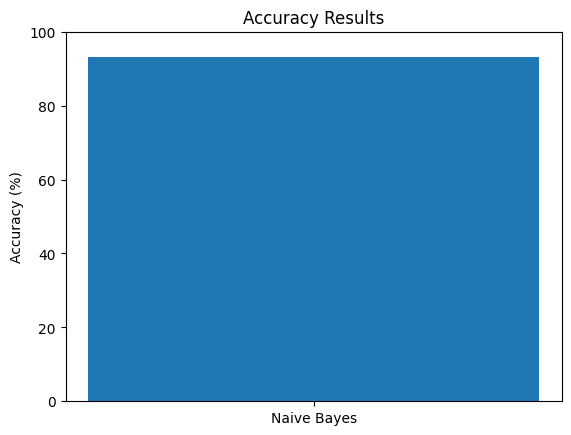

In [26]:
# Visualize results (example)
plt.bar(['Naive Bayes'], [accuracy_value])
plt.ylim([0, 100])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Results')
plt.show()